# Splitting & Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from pandas import MultiIndex, Int64Index

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

import bentoml

/home/don/miniconda3/envs/zoomcamp/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/tmp/ipykernel_32530/418281943.py:10: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('cleaned-marketing-campaign.csv')

In [3]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=11)
len(df_train), len(df_test), len(df_val)

(1337, 447, 447)

In [5]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [6]:
y_train = df_train.response.values
y_val = df_val.response.values
y_test = df_test.response.values

In [7]:
del df_train['response']
del df_val['response']
del df_test['response']

In [8]:
df_train.head().T

,0,1,2,3,4
Unnamed: 0,604,852,1631,816,1769
id,1177,4856,3570,2986,5534
year_birth,1966,1957,1969,1976,1975
education,Master,2n Cycle,PhD,Graduation,Master
marital_status,Together,Married,Together,Married,Married
income,49618.0,82347.0,42731.0,30772.0,47808.0
kidhome,1,0,1,1,0
teenhome,1,0,0,1,1
dt_customer,2013-01-26,2012-11-06,2013-10-21,2014-03-12,2013-10-20
recency,77,38,64,89,30


In [9]:
def mutual_info_response_score(series):
    return mutual_info_score(df_full_train.response, series)

In [10]:
df_full_train[categorical].apply(mutual_info_response_score)

education         0.006806
marital_status    0.008836
dt_customer       0.198412
dtype: float64

In [11]:
numerical = list(df_train.dtypes[df_train.dtypes == 'int64'].index)

In [12]:
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)

In [13]:
mis = df_train[numerical].corrwith(df_full_train.response)
mis.sort_values(ascending=False)

recency                0.066239
kidhome                0.063292
year_birth             0.058507
id                     0.041217
numwebvisitsmonth      0.020052
numstorepurchases      0.014004
numdealspurchases      0.013778
teenhome              -0.011545
complain              -0.012876
acceptedcmp2          -0.018296
mntwines              -0.020015
numwebpurchases       -0.020197
acceptedcmp1          -0.024362
mntfruits             -0.025951
mntgoldprods          -0.042125
numcatalogpurchases   -0.043255
acceptedcmp4          -0.043853
acceptedcmp5          -0.046560
mntfishproducts       -0.050855
mntmeatproducts       -0.050922
acceptedcmp3          -0.054799
cust_age              -0.058507
mntsweetproducts      -0.062930
Unnamed: 0            -0.080469
dtype: float64

In [14]:
dv = DictVectorizer(sparse=False)

In [15]:
train_dicts = df_train[categorical + numerical].to_dict('records')
train_dicts[0]

{'education': 'Master',
 'marital_status': 'Together',
 'dt_customer': '2013-01-26',
 'Unnamed: 0': 604,
 'id': 1177,
 'year_birth': 1966,
 'kidhome': 1,
 'teenhome': 1,
 'recency': 77,
 'mntwines': 80,
 'mntfruits': 3,
 'mntmeatproducts': 26,
 'mntfishproducts': 4,
 'mntsweetproducts': 2,
 'mntgoldprods': 14,
 'numdealspurchases': 4,
 'numwebpurchases': 3,
 'numcatalogpurchases': 1,
 'numstorepurchases': 3,
 'numwebvisitsmonth': 7,
 'acceptedcmp3': 0,
 'acceptedcmp4': 0,
 'acceptedcmp5': 0,
 'acceptedcmp1': 0,
 'acceptedcmp2': 0,
 'complain': 0,
 'cust_age': 49}

In [16]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [17]:
dv.get_feature_names_out()

array(['Unnamed: 0', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'complain', 'cust_age',
       'dt_customer=2012-07-30', 'dt_customer=2012-07-31',
       'dt_customer=2012-08-01', 'dt_customer=2012-08-02',
       'dt_customer=2012-08-03', 'dt_customer=2012-08-04',
       'dt_customer=2012-08-05', 'dt_customer=2012-08-07',
       'dt_customer=2012-08-08', 'dt_customer=2012-08-09',
       'dt_customer=2012-08-10', 'dt_customer=2012-08-11',
       'dt_customer=2012-08-12', 'dt_customer=2012-08-13',
       'dt_customer=2012-08-14', 'dt_customer=2012-08-16',
       'dt_customer=2012-08-17', 'dt_customer=2012-08-18',
       'dt_customer=2012-08-19', 'dt_customer=2012-08-20',
       'dt_customer=2012-08-22', 'dt_customer=2012-08-24',
       'dt_customer=2012-08-25', 'dt_customer=2012-08-26',
       'dt_customer=2012-08-27', 'dt_customer=2012-08-29',
       'dt_customer=2012-08-30', 'dt_customer=2012-08-31',
       'dt_customer=2012-09-02', 'dt_custo

In [18]:
dv.transform(train_dicts)

array([[6.040e+02, 0.000e+00, 0.000e+00, ..., 7.700e+01, 1.000e+00,
        1.966e+03],
       [8.520e+02, 1.000e+00, 0.000e+00, ..., 3.800e+01, 0.000e+00,
        1.957e+03],
       [1.631e+03, 0.000e+00, 0.000e+00, ..., 6.400e+01, 0.000e+00,
        1.969e+03],
       ...,
       [1.200e+02, 0.000e+00, 0.000e+00, ..., 6.500e+01, 1.000e+00,
        1.953e+03],
       [5.460e+02, 0.000e+00, 0.000e+00, ..., 6.800e+01, 0.000e+00,
        1.964e+03],
       [1.457e+03, 0.000e+00, 0.000e+00, ..., 4.900e+01, 1.000e+00,
        1.972e+03]])

In [19]:
train_dicts

[{'education': 'Master',
  'marital_status': 'Together',
  'dt_customer': '2013-01-26',
  'Unnamed: 0': 604,
  'id': 1177,
  'year_birth': 1966,
  'kidhome': 1,
  'teenhome': 1,
  'recency': 77,
  'mntwines': 80,
  'mntfruits': 3,
  'mntmeatproducts': 26,
  'mntfishproducts': 4,
  'mntsweetproducts': 2,
  'mntgoldprods': 14,
  'numdealspurchases': 4,
  'numwebpurchases': 3,
  'numcatalogpurchases': 1,
  'numstorepurchases': 3,
  'numwebvisitsmonth': 7,
  'acceptedcmp3': 0,
  'acceptedcmp4': 0,
  'acceptedcmp5': 0,
  'acceptedcmp1': 0,
  'acceptedcmp2': 0,
  'complain': 0,
  'cust_age': 49},
 {'education': '2n Cycle',
  'marital_status': 'Married',
  'dt_customer': '2012-11-06',
  'Unnamed: 0': 852,
  'id': 4856,
  'year_birth': 1957,
  'kidhome': 0,
  'teenhome': 0,
  'recency': 38,
  'mntwines': 556,
  'mntfruits': 54,
  'mntmeatproducts': 845,
  'mntfishproducts': 202,
  'mntsweetproducts': 133,
  'mntgoldprods': 63,
  'numdealspurchases': 1,
  'numwebpurchases': 7,
  'numcatalogpurc

In [20]:
X_train = dv.fit_transform(train_dicts)
X_train.shape

(1337, 628)

In [21]:
val_dicts = df_val[categorical + numerical].to_dict('records')
val_dicts[0]

{'education': 'Graduation',
 'marital_status': 'Divorced',
 'dt_customer': '2013-02-14',
 'Unnamed: 0': 2166,
 'id': 2429,
 'year_birth': 1954,
 'kidhome': 0,
 'teenhome': 1,
 'recency': 4,
 'mntwines': 531,
 'mntfruits': 69,
 'mntmeatproducts': 300,
 'mntfishproducts': 150,
 'mntsweetproducts': 138,
 'mntgoldprods': 150,
 'numdealspurchases': 3,
 'numwebpurchases': 5,
 'numcatalogpurchases': 4,
 'numstorepurchases': 8,
 'numwebvisitsmonth': 2,
 'acceptedcmp3': 0,
 'acceptedcmp4': 0,
 'acceptedcmp5': 0,
 'acceptedcmp1': 0,
 'acceptedcmp2': 0,
 'complain': 0,
 'cust_age': 61}

In [22]:
X_val = dv.transform(val_dicts)
X_val.shape

(447, 628)

## Logistic Regression model

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/don/miniconda3/envs/zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
model.intercept_[0]

-3.830085897557975e-06

In [25]:
model.coef_[0].round(3)

array([ 0.   ,  0.001,  0.   ,  0.002,  0.001,  0.001,  0.   , -0.007,
        0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,
        0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   , -0.   ,
        0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,
       -0.   ,  0.   ,  0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   ,
        0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   , -0.   ,  0.   ,
        0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,
        0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   ,
        0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,
      

In [26]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
model.predict_proba(X_train)[:, 1]

array([0.04178992, 0.30864751, 0.07064738, ..., 0.04502152, 0.18375481,
       0.07993213])

In [28]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.43548689, 0.16037343, 0.11597707, 0.05959349, 0.0693256 ,
       0.2631535 , 0.15637866, 0.02668956, 0.50027862, 0.25658329,
       0.02101619, 0.13538808, 0.42736117, 0.06981559, 0.06655374,
       0.18344807, 0.1084893 , 0.10145151, 0.15555092, 0.43188904,
       0.57835784, 0.20220647, 0.35026756, 0.0975103 , 0.11256975,
       0.27225992, 0.1384415 , 0.1690611 , 0.20291099, 0.28677546,
       0.0737506 , 0.37576315, 0.1771167 , 0.1341381 , 0.15951011,
       0.17044559, 0.26416967, 0.03358988, 0.0472654 , 0.03086951,
       0.07078378, 0.05250044, 0.05089588, 0.20993537, 0.11329542,
       0.3199921 , 0.22972704, 0.31754324, 0.24078914, 0.15094426,
       0.170558  , 0.09616833, 0.31485138, 0.18146381, 0.04879513,
       0.124002  , 0.04644145, 0.0592586 , 0.22590245, 0.053937  ,
       0.09680099, 0.16456946, 0.31731487, 0.10488122, 0.06793465,
       0.66464591, 0.10611079, 0.12904356, 0.13202474, 0.10355423,
       0.32114624, 0.1201266 , 0.45071615, 0.05252296, 0.03246

In [29]:
response_decision = y_pred >= 0.5

In [30]:
df_val[response_decision].id

8       9595
20      9493
65      7962
122     3005
138     6184
161     1729
166     4114
227     8720
229     7101
347     1103
362     1650
389     1772
390     9560
418    10150
432     1631
433     1031
Name: id, dtype: int64

In [31]:
response_decision.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
(y_val == response_decision).mean()

0.8456375838926175

In [33]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = response_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.435487,0,0
1,0.160373,0,0
2,0.115977,0,1
3,0.059593,0,0
4,0.069326,0,0
...,...,...,...
442,0.096672,0,0
443,0.408817,0,1
444,0.035689,0,1
445,0.086172,0,0


In [34]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.435487,0,0,True
1,0.160373,0,0,True
2,0.115977,0,1,False
3,0.059593,0,0,True
4,0.069326,0,0,True
...,...,...,...,...
442,0.096672,0,0,True
443,0.408817,0,1,False
444,0.035689,0,1,False
445,0.086172,0,0,True


In [35]:
df_pred.correct.mean()

0.8456375838926175

## Decision Tree

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [38]:
roc_auc_score(y_val, y_pred)

0.6902344920587354

In [39]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [40]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.8515176447441378
val: 0.697108181000899


In [42]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.632
   2 -> 0.650
   3 -> 0.714
   4 -> 0.705
   5 -> 0.697
   6 -> 0.597
  10 -> 0.599
  15 -> 0.561
  20 -> 0.585
None -> 0.676


In [43]:
for m in [3, 4, 5, 6, 7, 10, 15, 20, 50, 75, 100, 150, 200]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 3
1 -> 0.714
5 -> 0.721
10 -> 0.730
15 -> 0.730
20 -> 0.721
50 -> 0.732
100 -> 0.696
200 -> 0.682

depth: 4
1 -> 0.705
5 -> 0.738
10 -> 0.740
15 -> 0.740
20 -> 0.734
50 -> 0.747
100 -> 0.715
200 -> 0.688

depth: 5
1 -> 0.667
5 -> 0.734
10 -> 0.749
15 -> 0.759
20 -> 0.764
50 -> 0.767
100 -> 0.728
200 -> 0.688

depth: 6
1 -> 0.605
5 -> 0.675
10 -> 0.727
15 -> 0.787
20 -> 0.790
50 -> 0.785
100 -> 0.740
200 -> 0.688

depth: 7
1 -> 0.613
5 -> 0.680
10 -> 0.729
15 -> 0.776
20 -> 0.788
50 -> 0.808
100 -> 0.746
200 -> 0.688

depth: 10
1 -> 0.598
5 -> 0.729
10 -> 0.770
15 -> 0.767
20 -> 0.795
50 -> 0.813
100 -> 0.749
200 -> 0.688

depth: 15
1 -> 0.608
5 -> 0.716
10 -> 0.761
15 -> 0.761
20 -> 0.786
50 -> 0.821
100 -> 0.749
200 -> 0.688

depth: 20
1 -> 0.595
5 -> 0.697
10 -> 0.755
15 -> 0.769
20 -> 0.792
50 -> 0.810
100 -> 0.749
200 -> 0.688

depth: 50
1 -> 0.673
5 -> 0.728
10 -> 0.756
15 -> 0.764
20 -> 0.798
50 -> 0.821
100 -> 0.749
200 -> 0.688

depth: 75
1 -> 0.678
5 -> 0.734
10 -> 0.76

In [44]:
d = 20

In [45]:

for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.590
5 -> 0.730
10 -> 0.752
15 -> 0.775
20 -> 0.796
50 -> 0.821
100 -> 0.749
200 -> 0.688


In [46]:
s = 50

In [47]:
dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.8168077614623914

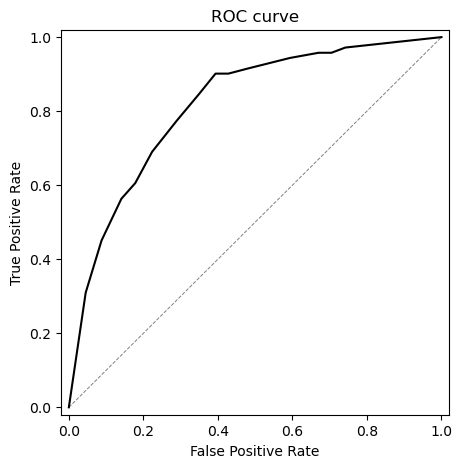

In [48]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [49]:
dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50)

## Ensemble and random forest

In [50]:
rf = RandomForestClassifier(n_estimators=10, random_state=11)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7841249625412047

In [51]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.798 +- 0.022
0.777 -- 0.820


In [52]:
aucs = []

for i in range(330, 801, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=11)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

330 -> 0.860
340 -> 0.861
350 -> 0.862
360 -> 0.862
370 -> 0.860
380 -> 0.861
390 -> 0.862
400 -> 0.863
410 -> 0.864
420 -> 0.863
430 -> 0.863
440 -> 0.864
450 -> 0.864
460 -> 0.864
470 -> 0.864
480 -> 0.864
490 -> 0.864
500 -> 0.865
510 -> 0.865
520 -> 0.866
530 -> 0.866
540 -> 0.865
550 -> 0.865
560 -> 0.865
570 -> 0.865
580 -> 0.865
590 -> 0.865
600 -> 0.865
610 -> 0.865
620 -> 0.866
630 -> 0.866
640 -> 0.866
650 -> 0.864
660 -> 0.865
670 -> 0.865
680 -> 0.864
690 -> 0.864
700 -> 0.864
710 -> 0.864
720 -> 0.864
730 -> 0.864
740 -> 0.864
750 -> 0.865
760 -> 0.864
770 -> 0.864
780 -> 0.865
790 -> 0.864
800 -> 0.864


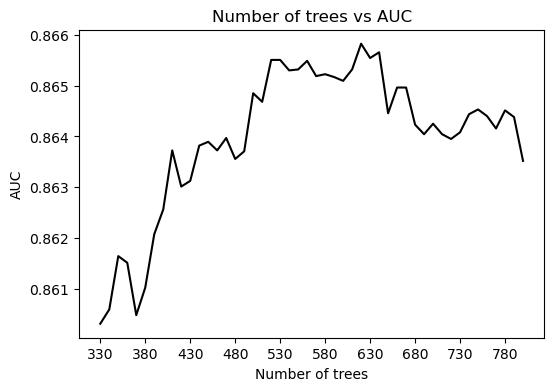

In [53]:
plt.figure(figsize=(6, 4))

plt.plot(range(330, 801, 10), aucs, color='black')
plt.xticks(range(330, 801, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

In [54]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(600, 671, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=11)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 5
600 -> 0.840
610 -> 0.839
620 -> 0.840
630 -> 0.840
640 -> 0.840
650 -> 0.840
660 -> 0.839
670 -> 0.840

depth: 10
600 -> 0.860
610 -> 0.860
620 -> 0.861
630 -> 0.861
640 -> 0.862
650 -> 0.862
660 -> 0.862
670 -> 0.862

depth: 20
600 -> 0.866
610 -> 0.866
620 -> 0.866
630 -> 0.866
640 -> 0.867
650 -> 0.867
660 -> 0.867
670 -> 0.867



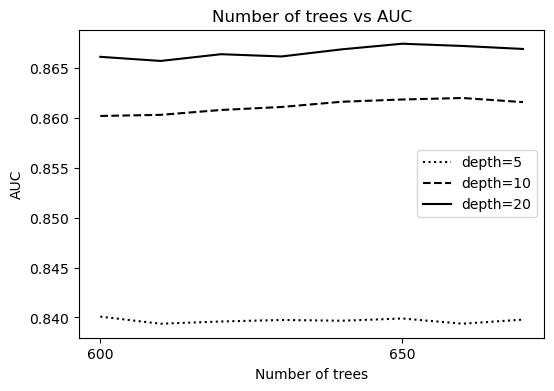

In [55]:
plt.figure(figsize=(6, 4))

num_trees = list(range(600, 671, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(600, 671, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

In [56]:
all_aucs = {}

for m in [1, 2, 3]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(620, 651, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=20, min_samples_leaf=m, random_state=11)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 1
620 -> 0.866
630 -> 0.866
640 -> 0.867
650 -> 0.867

min_samples_leaf: 2
620 -> 0.862
630 -> 0.863
640 -> 0.862
650 -> 0.862

min_samples_leaf: 3
620 -> 0.856
630 -> 0.856
640 -> 0.856
650 -> 0.856



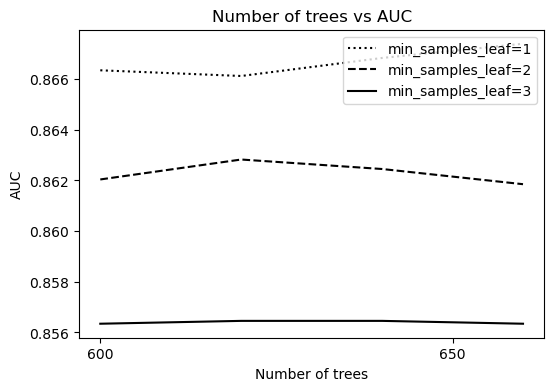

In [57]:
plt.figure(figsize=(6, 4))

num_trees = list(range(600, 671, 20))

plt.plot(num_trees, all_aucs[1], label='min_samples_leaf=1', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[2], label='min_samples_leaf=2', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='solid')
    
plt.xticks(range(600, 671, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

In [58]:
rf = RandomForestClassifier(n_estimators=640, max_depth=20, min_samples_leaf=1, random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=640, random_state=11)

In [59]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
random_forest = roc_auc_score(y_val, y_pred_rf)
random_forest

0.8668339826191188

## Gradient boosting and XGBOOST

In [60]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [61]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[20:49:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
y_pred = model.predict(dval)

In [63]:
roc_auc_score(y_val, y_pred)

0.8450516931375487

In [64]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [65]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=10,evals=watchlist)

In [66]:
s = output.stdout

In [67]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [68]:
df_score = parse_xgb_output(output)

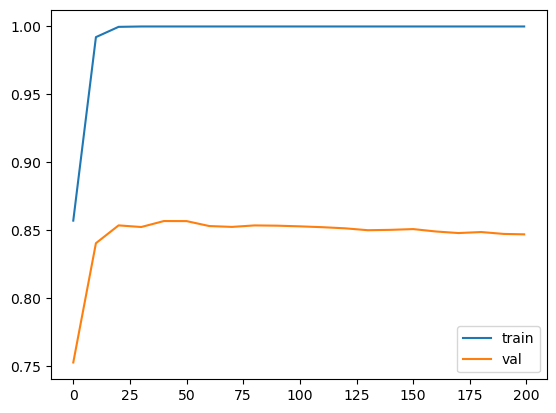

In [69]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [70]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [71]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

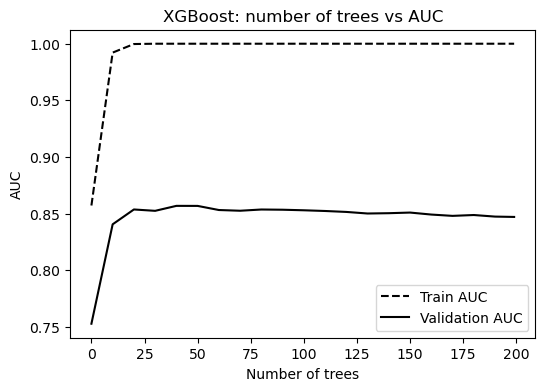

In [72]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 201, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

Let's tune some parameters

In [73]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=700, verbose_eval=10,
                  evals=watchlist)

In [74]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.85676
(0.85676, 40)


In [75]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=700, verbose_eval=10,
                  evals=watchlist)

In [76]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.86713
(0.86713, 180)


In [77]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=700, verbose_eval=10,
                  evals=watchlist)

In [78]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.86534
(0.86534, 300)


In [79]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=700, verbose_eval=10,
                  evals=watchlist)

In [80]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.86556
(0.86556, 699)


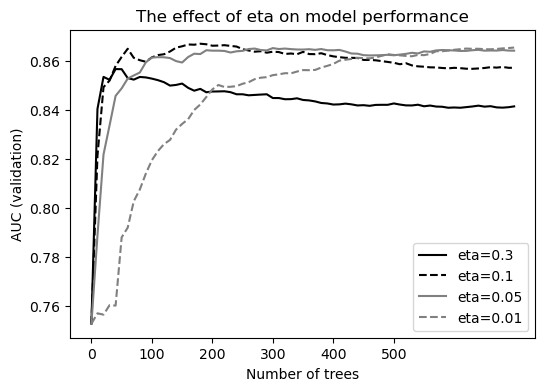

In [81]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

In [82]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=700, verbose_eval=10,
                  evals=watchlist)

In [83]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.86564
(0.86564, 120)


In [84]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=700, verbose_eval=10,
                  evals=watchlist)

In [85]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.85676
(0.87077, 140)


In [86]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=700, verbose_eval=10,
                  evals=watchlist)

In [87]:
tree, _, aucs_val_depth15 = parse_xgb_output(output)
print(max(aucs_val_depth15))
print(max(zip(aucs_val_depth15, tree)))

0.875
(0.875, 120)


In [88]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 20,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=700, verbose_eval=10,
                  evals=watchlist)

In [89]:
tree, _, aucs_val_depth20 = parse_xgb_output(output)
print(max(aucs_val_depth20))
print(max(zip(aucs_val_depth20, tree)))

0.875
(0.875, 120)


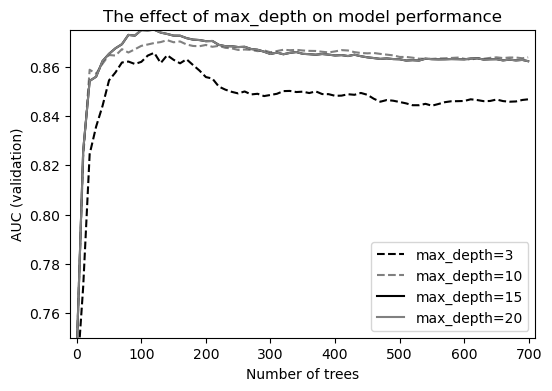

In [90]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='dashed', label='max_depth=10')
plt.plot(tree, aucs_val_depth15, color='black', linestyle='solid', label='max_depth=15')
plt.plot(tree, aucs_val_depth20, color='grey', linestyle='solid', label='max_depth=20')

plt.ylim(0.75, 0.875)
plt.xlim(-10, 710)
plt.xticks(range(0, 701, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

In [91]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=120, verbose_eval=10,
                  evals=watchlist)

In [92]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.87519
(0.87519, 119)


In [93]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 15,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=120, verbose_eval=10,
                  evals=watchlist)

In [94]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.86114
(0.86114, 50)


In [95]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 15,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=120, verbose_eval=10,
                  evals=watchlist)

In [96]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.81138
(0.81138, 50)


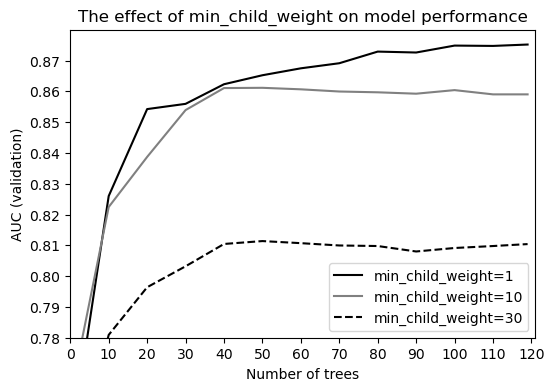

In [97]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.80, 0.88)
plt.xlim(0, 121)
plt.xticks(range(0, 121, 10))
plt.yticks(np.linspace(0.78, 0.87, 10))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

In [98]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=120, verbose_eval=10,
                  evals=watchlist)

In [99]:
print(output)

[0]	train-auc:0.88836	val-auc:0.74386
[10]	train-auc:0.97678	val-auc:0.82600
[20]	train-auc:0.99762	val-auc:0.85423
[30]	train-auc:0.99989	val-auc:0.85593
[40]	train-auc:1.00000	val-auc:0.86230
[50]	train-auc:1.00000	val-auc:0.86522
[60]	train-auc:1.00000	val-auc:0.86747
[70]	train-auc:1.00000	val-auc:0.86912
[80]	train-auc:1.00000	val-auc:0.87290
[90]	train-auc:1.00000	val-auc:0.87260
[100]	train-auc:1.00000	val-auc:0.87485
[110]	train-auc:1.00000	val-auc:0.87474
[119]	train-auc:1.00000	val-auc:0.87519



In [100]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.87519


In [101]:
max(zip(aucs_val, tree))

(0.87519, 119)

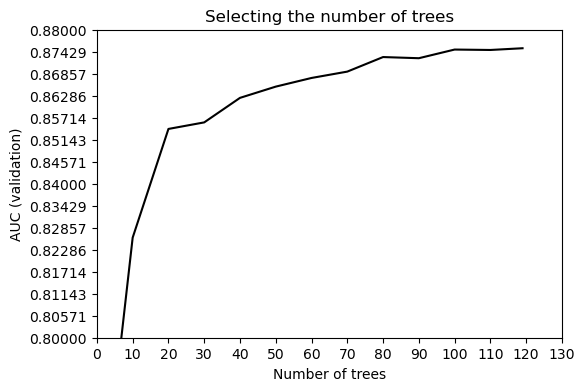

In [102]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.865)
plt.xlim(0, 130)
plt.xticks(range(0, 131, 10))
plt.yticks(np.linspace(0.80, 0.88, 15))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

In [103]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=120, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.88836	val-auc:0.74386
[10]	train-auc:0.97678	val-auc:0.82600
[20]	train-auc:0.99762	val-auc:0.85423
[30]	train-auc:0.99989	val-auc:0.85593
[40]	train-auc:1.00000	val-auc:0.86230
[50]	train-auc:1.00000	val-auc:0.86522
[60]	train-auc:1.00000	val-auc:0.86747
[70]	train-auc:1.00000	val-auc:0.86912
[80]	train-auc:1.00000	val-auc:0.87290
[90]	train-auc:1.00000	val-auc:0.87260
[100]	train-auc:1.00000	val-auc:0.87485
[110]	train-auc:1.00000	val-auc:0.87474
[119]	train-auc:1.00000	val-auc:0.87519


In [104]:
y_pred_xgb = model.predict(dval)

In [105]:
roc_auc_score(y_val, y_pred_xgb)

0.8751872939766258

In [106]:
print("Decision Tree: ", roc_auc_score(y_val, y_pred_dt))
print("Random Forest: ", roc_auc_score(y_val, y_pred_rf))
print("XGBoost: ", roc_auc_score(y_val, y_pred_xgb))

Decision Tree:  0.8168077614623914
Random Forest:  0.8668339826191188
XGBoost:  0.8751872939766258


In [107]:
print("Logistic Regression:", df_pred.correct.mean())

Logistic Regression: 0.8456375838926175
